### Identificar puentes de H (Baker-Hubbard)

In [1]:
from __future__ import print_function
%matplotlib inline
import matplotlib.pyplot as plt
import itertools
import mdtraj as md
import mdtraj.testing

#### Cargar un pequeño péptido de 28 residuos

In [2]:
t = md.load_pdb('http://www.rcsb.org/pdb/files/2EQQ.pdb')

print(t)

<mdtraj.Trajectory with 20 frames, 423 atoms, 28 residues, without unitcells>


/home/liliana/Myopt/Miniconda/miniconda3/envs/UIBCDF_lab/lib/python3.7/site-packages/mdtraj/formats/pdb/pdbfile.py:198: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  'cell vectors.', category=UserWarning)


**md.baker_hubbard** identifica enlaces de hidrógeno en los puntos de corte para el donante-H, distancia y ángulo del aceptor.

El valor de retorno es una lista de los índices de los átomos (donante --H-- aceptor) que satisfacen este criterio.

In [3]:
hbonds = md.baker_hubbard(t, periodic=False)
label = lambda hbond : '%s -- %s' % (t.topology.atom(hbond[0]), t.topology.atom(hbond[2]))
for hbond in hbonds:
    print(label(hbond))

GLU1-N -- GLU1-OE2
GLU1-N -- GLU1-OE1
GLY6-N -- SER4-O
CYS7-N -- GLY5-O
TYR11-N -- VAL8-O
MET12-N -- LYS20-O
ARG13-NH1 -- TYR11-O
THR14-N -- ARG18-O
ASP16-N -- ASP16-OD1
GLY17-N -- THR14-O
ARG18-N -- THR14-OG1
ARG18-NE -- ASP16-OD2
LYS20-N -- MET12-O
THR22-N -- GLY10-O
THR14-OG1 -- ASP16-OD1
THR28-OG1 -- ILE27-O


#### Calcular las distancias reales entre donantes y aceptores.

In [4]:
da_distances = md.compute_distances(t, hbonds[:, [0,2]], periodic = False)

#### Calculando un histograma

Text(0.5, 0, 'Donor-acceptor distance [nm]')

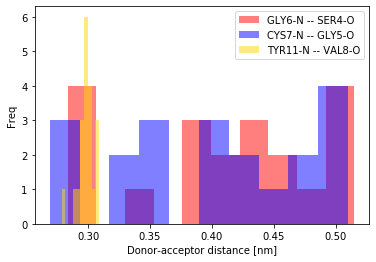

In [5]:
color = itertools.cycle(['r', 'b', 'gold'])
for i in [2, 3, 4]:
    plt.hist(da_distances[:, i], color = next(color), label = label (hbonds[i]), alpha = 0.5)
plt.legend()
plt.ylabel('Freq');
plt.xlabel('Donor-acceptor distance [nm]')